In [1]:
# %pip install pycaret -U -q

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.regression import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)

import warnings
warnings.filterwarnings('ignore')

### Carregamento dos dados

In [3]:
df1 = pd.read_csv("./dataset_vegetais.csv")
df1.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


# Exploração e limpeza dos dados

In [4]:
df1.duplicated().sum()

0

In [5]:
df1.isna().sum()

SN           0
Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

In [6]:
df1.drop(['Minimum', 'Maximum'], axis=1, inplace=True)

In [7]:
# sample 5% of data to be used as unseen data
df_train_test = df1.sample(frac=0.95, random_state=123)
df_valid = df1.drop(df_train_test.index)
df_train_test.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(df_train_test.shape))
print('Unseen Data For Predictions: ' + str(df_valid.shape))


Data for Modeling: (187303, 5)
Unseen Data For Predictions: (9858, 5)


In [8]:
df1.head()

,SN,Commodity,Date,Unit,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,29.0
2,2,Potato Red,2013-06-16,Kg,20.5
3,3,Potato White,2013-06-16,Kg,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,29.0


<Axes: >

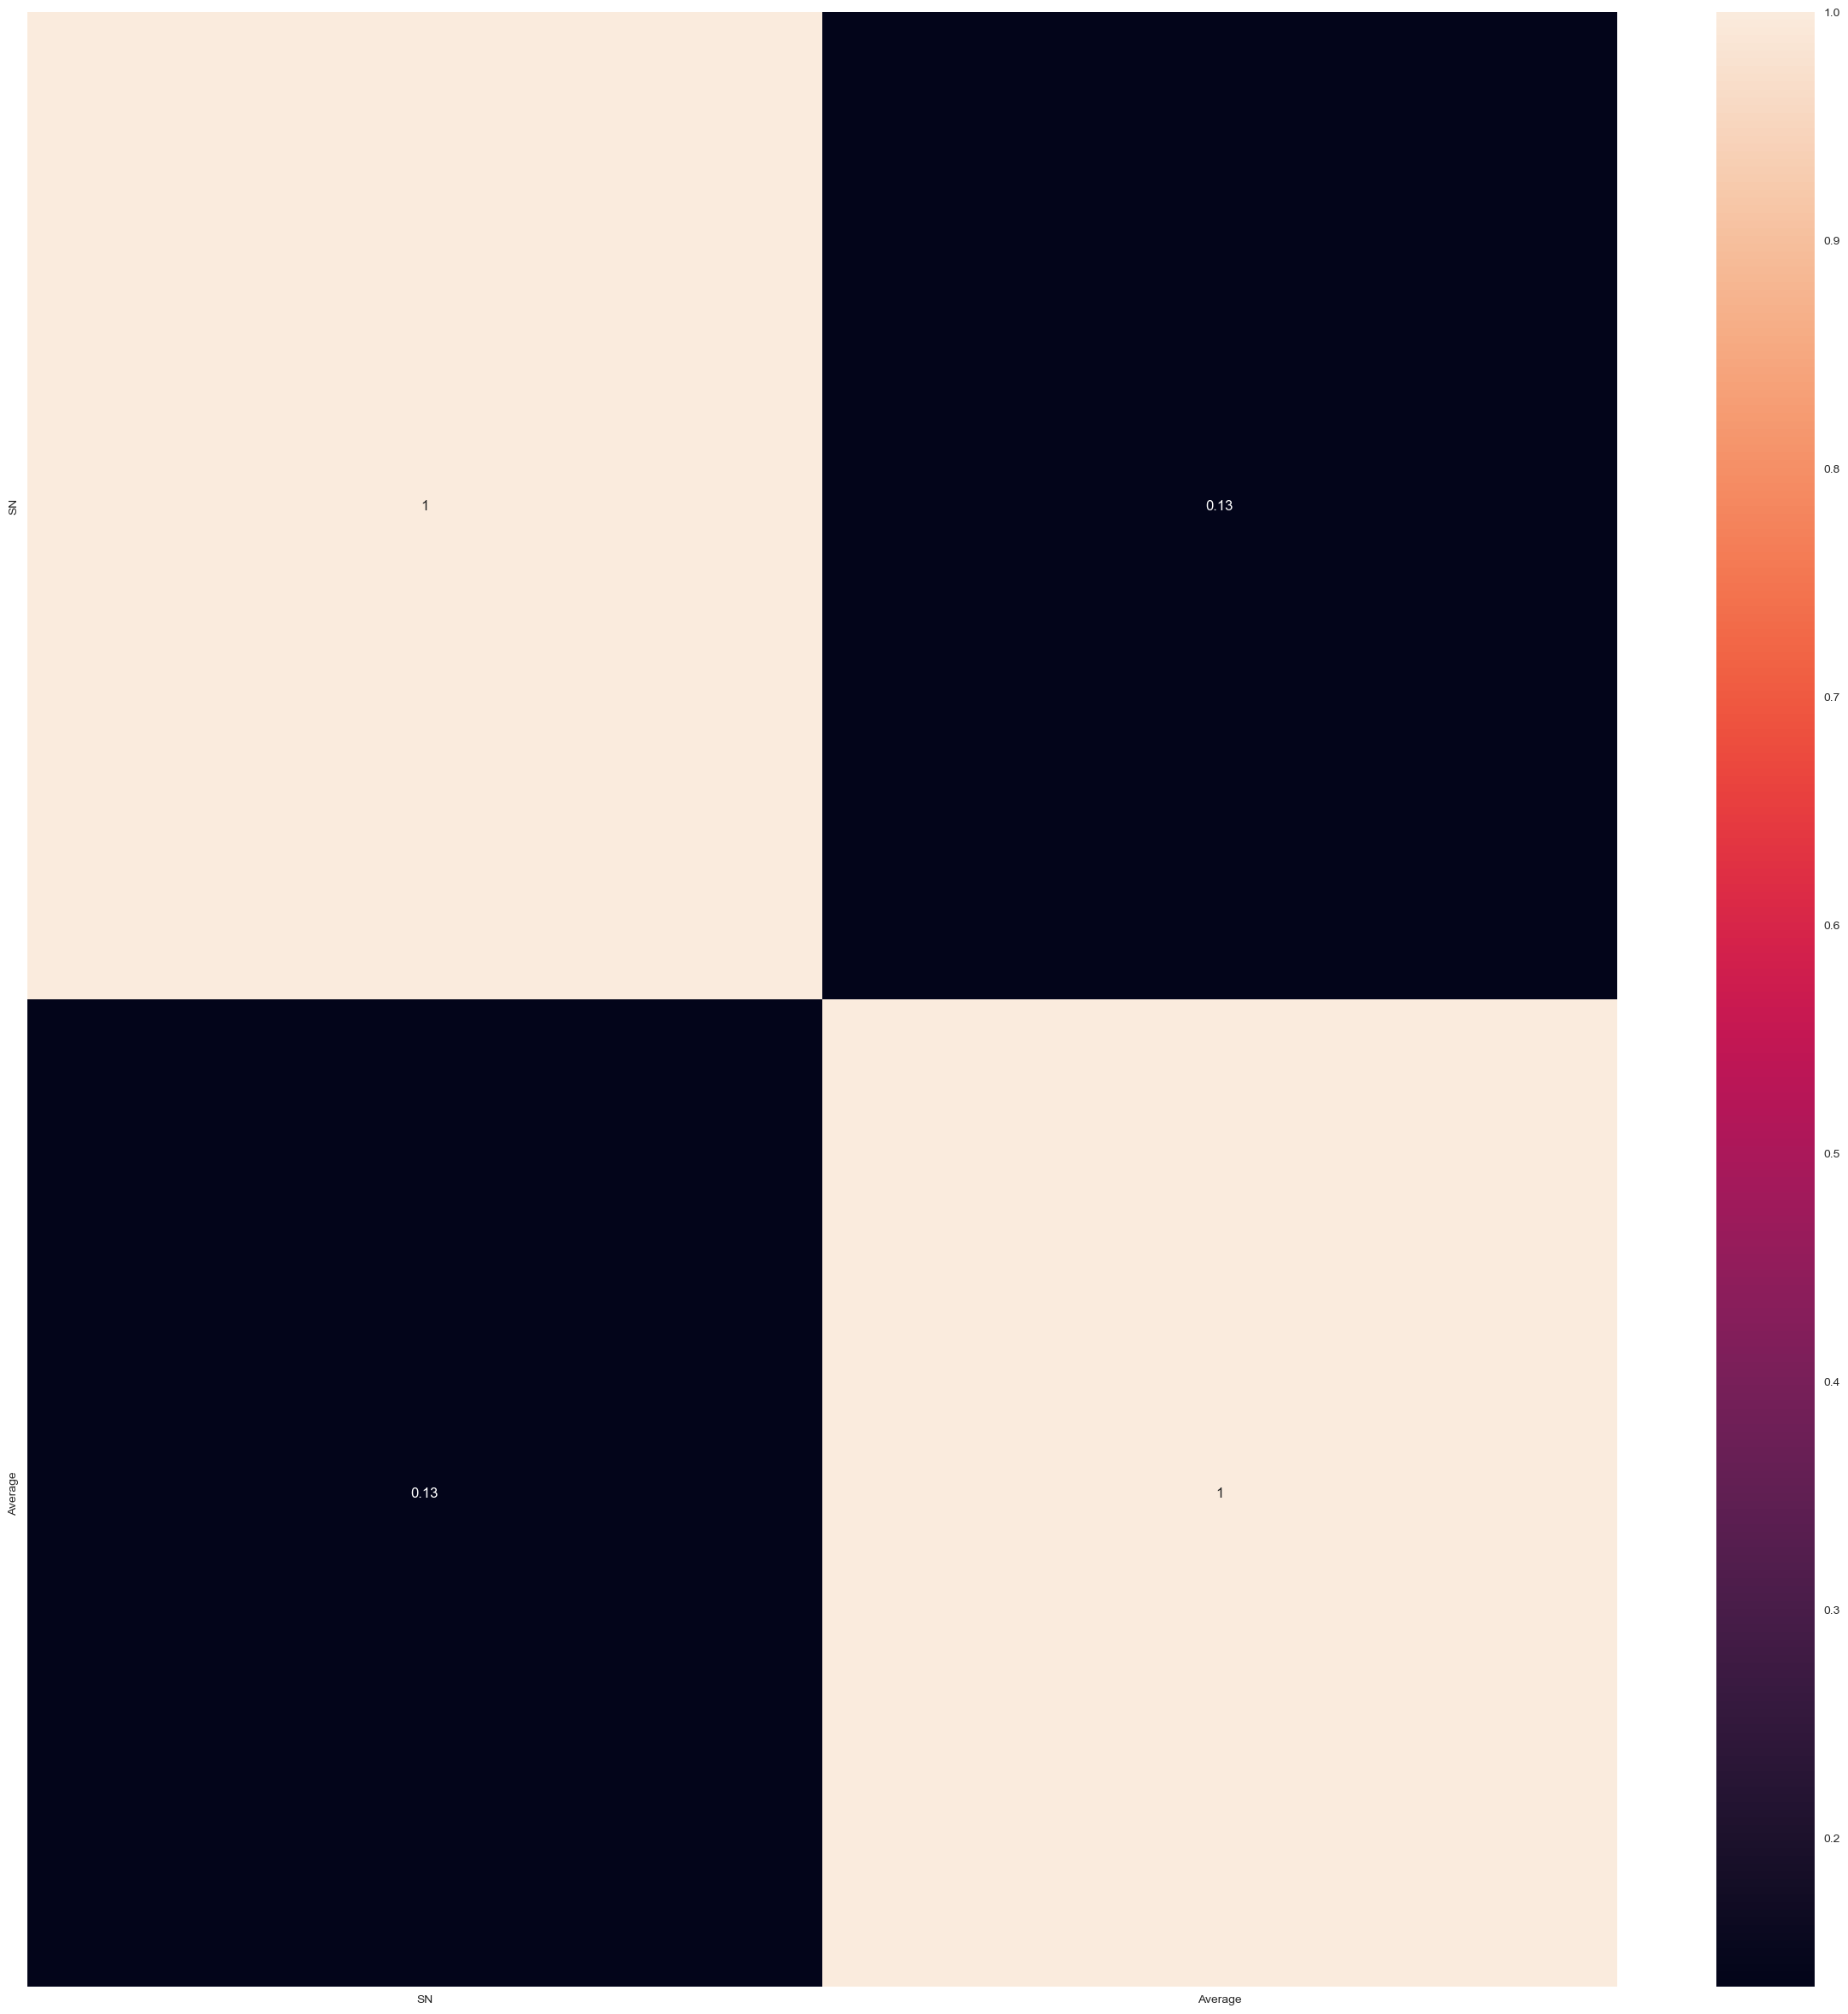

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(),annot=True)

In [10]:
df1.describe()

,SN,Average
count,197161.000000,197161.000000
mean,98580.000000,89.792611
std,56915.622549,79.619003
min,0.000000,5.000000
25%,49290.000000,42.500000
50%,98580.000000,65.000000
75%,147870.000000,105.000000
max,197160.000000,1900.000000


# Configurando PyCaret

In [11]:
s = setup(df_train_test, target = 'Average', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Average
2,Target type,Regression
3,Original data shape,"(187303, 5)"
4,Transformed data shape,"(187303, 8)"
5,Transformed train set shape,"(131112, 8)"
6,Transformed test set shape,"(56191, 8)"
7,Numeric features,1
8,Categorical features,3
9,Preprocess,True


In [12]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:10:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [13]:
print(best_model)

RandomForestRegressor(n_jobs=-1, random_state=123)


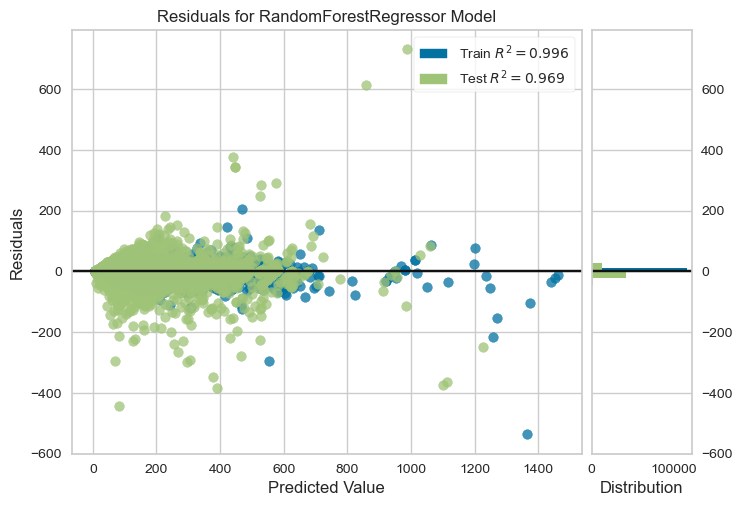

In [14]:
plot_model(best_model)

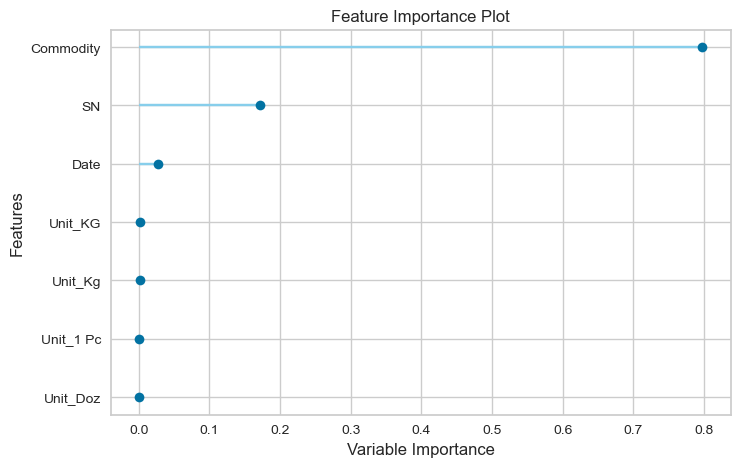

In [15]:
plot_model(best_model, plot = 'feature')

In [16]:
predition = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,5.8906,192.0961,13.8599,0.9695,0.1417,0.0902


In [17]:
predictions = predict_model(best_model, data=df_valid)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,5.8998,189.1418,13.7529,0.9702,0.1465,0.0922


,SN,Commodity,Date,Unit,Average,prediction_label
0,0,Tomato Big(Nepali),2013-06-16,Kg,37.5,29.250
1,4,Onion Dry (Indian),2013-06-16,Kg,29.0,38.405
2,47,Bamboo Shoot,2013-06-16,Kg,55.0,55.600
3,55,Grapes(Green),2013-06-16,Kg,255.0,253.700
4,59,Cucumber(Local),2013-06-16,Kg,27.5,28.990


In [19]:
save_model(best_model, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\CROSSD~1\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['SN'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Commodity', 'Date', 'Unit'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Unit'],
                                     transformer=OneHotEncoder(cols=['Unit'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['Commodity', 'Date'],
                                     transformer=TargetEncoder(cols=['Commodity',
               